In [383]:
#imort the required libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [384]:
td = pd.read_csv('/Users/sbp/Downloads/twitterdatav1.csv')

In [385]:
td.shape


(13232, 14)

In [386]:
#check for missing values
td.isnull().values.any()

True

In [387]:
td.isnull().sum()

date                       0
tweet                      0
lang                       0
retweetCount               0
likeCount                  0
replyCount                 0
username                   0
user_followersCount        0
user_friendsCount          0
verifiedStatus             0
tweet_url                  0
hastags                11649
chr_count                  0
topic                      0
dtype: int64

In [388]:
#Percentage of missing values
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(td)

hastags => 88.04%


In [389]:
newtd = td.drop(['hastags','verifiedStatus','tweet_url','lang','replyCount','chr_count','user_friendsCount'], axis=1)


In [390]:
newtd.columns

Index(['date', 'tweet', 'retweetCount', 'likeCount', 'username',
       'user_followersCount', 'topic'],
      dtype='object')

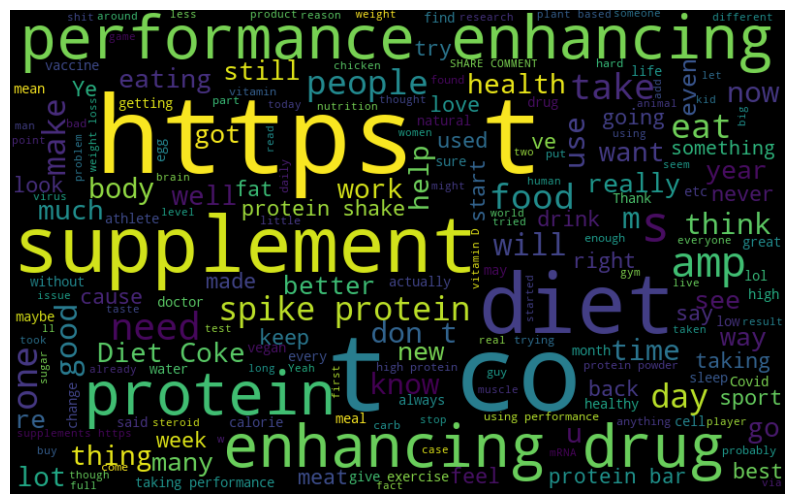

In [545]:
from wordcloud import WordCloud
all_words = ''.join([word for word in newtd['tweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [392]:
# Analyze the sentiments from the given text dat i.e, our tweets
from textblob import TextBlob

def get_tweet_sentiment(tweet):
    # Create a TextBlob object from the tweet text
    blob = TextBlob(tweet)
    
    # Get the polarity score (range from -1 to 1)
    sentiment_score = blob.sentiment.polarity
    
    # Assign sentiment label based on polarity score
    if sentiment_score > 0:
        sentiment = 'positive'
    elif sentiment_score < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    return sentiment

newtd['sentiments'] = newtd["tweet"].apply(get_tweet_sentiment)

In [393]:
from textblob import TextBlob

def get_tweet_sentiment_score(tweet):
    # Create a TextBlob object from the tweet text
    blob = TextBlob(tweet)
    
    # Get the polarity score (range from -1 to 1)
    sentiment_score = blob.sentiment.polarity
    
    # Assign sentiment label based on polarity score
    if sentiment_score > 0:
        sentiment = 1
    elif sentiment_score < 0:
        sentiment = -1
    else:
        sentiment = 0
    
    return sentiment

newtd['score'] = newtd["tweet"].apply(get_tweet_sentiment_score)

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiments', ylabel='count'>

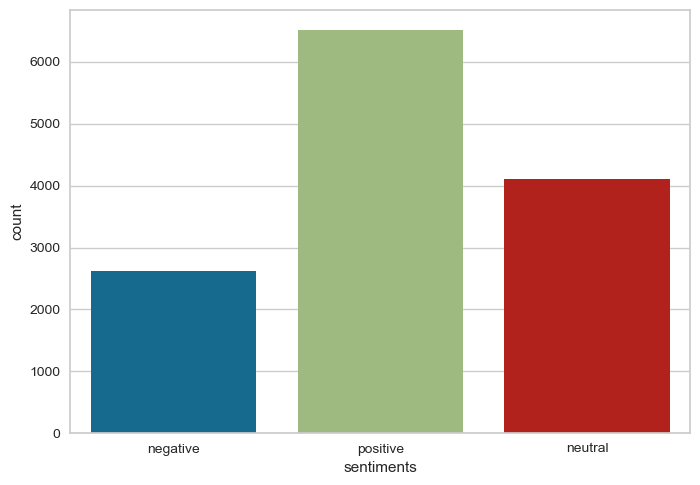

In [394]:
# Understand how customer ratings are distributed
import seaborn as sns
sns.countplot(newtd['sentiments'])

In [395]:
# no of positive and negative reviews
newtd['sentiments'].value_counts()
#here we can say it is a unbalanced data set

positive    6513
neutral     4103
negative    2616
Name: sentiments, dtype: int64

In [396]:
#clean the tweets
# Define a function to clean the tweet text
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'\b\w{1,3}\b', '',tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Tokenize the tweet into individual words
    words = tweet.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join the cleaned words back into a string
    cleaned_tweet = ' '.join(words)
    return cleaned_tweet

newtd['ctweet'] = newtd['tweet'].apply(lambda x: clean_tweet(x))
newtd.head()

date                                              tweet  \
0  2022-10-01  tongkat ali + mushroom blend + green blend + g...   
1  2022-10-01  @meatguyf @Ren_Chandler4 I also bought the Fre...   
2  2022-10-01  @danluu No history of doping/supplements in re...   
3  2022-10-01  @parilani Uniform code of military justice req...   
4  2022-10-01  Once again make sure you speak with your physi...   

   retweetCount  likeCount       username  user_followersCount        topic  \
0             0          0      WhoIsNo17                  593  supplements   
1             0          1       Elpico72                  253  supplements   
2             0          1     jaseemabid                 3863  supplements   
3             0          1       G_T_Tate                  721  supplements   
4             0          0  Drea_Out_Loud                  277  supplements   

  sentiments  score                                             ctweet  
0   negative     -1  tongkat mushroom blend green blend grass feed ...  
1   positive      1  also bought freaks geeks shoutfactory announce...  
2   negative     -1  history dopingsupplements recent know teams ch...  
3   negative     -1  uniform code military justice requires bread w...  
4   positive      1  make sure speak physician comes taking vitamin...

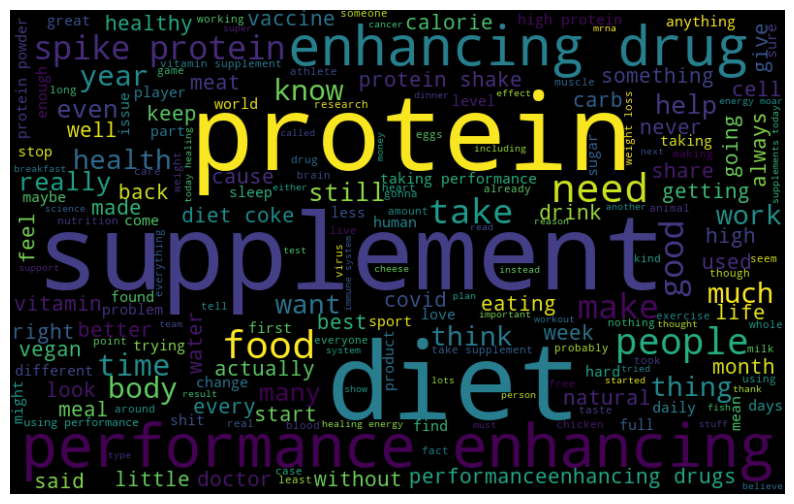

In [397]:
from wordcloud import WordCloud
all_words = ''.join([word for word in newtd['ctweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [400]:
#Positive review: cloud word
from wordcloud import WordCloud
all_words = ''.join([word for word in newtd['score']== 1]['ctweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1313221342.py, line 3)

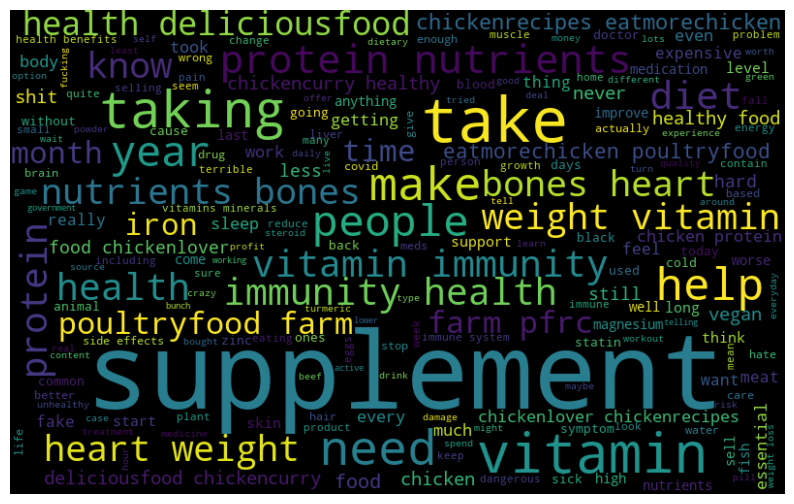

In [268]:
#Negative review: cloud word
from wordcloud import WordCloud
all_words = ''.join([word for word in newtd[newtd['score']== -1]['ctweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

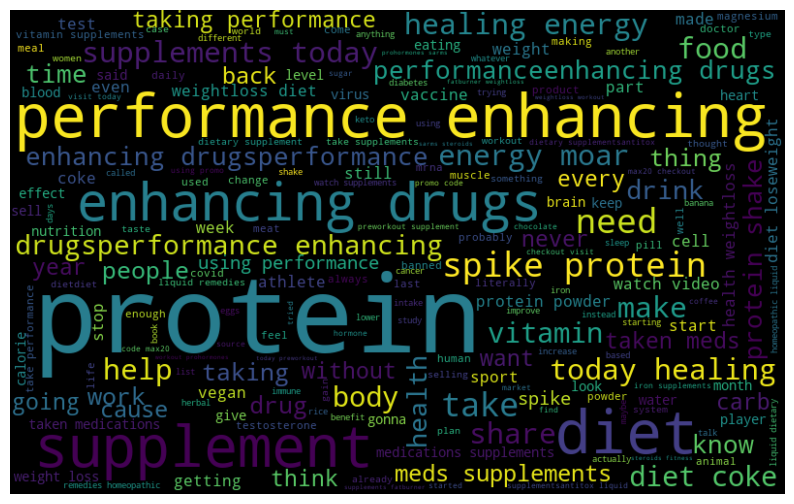

In [401]:
#Neutral review: cloud word
from wordcloud import WordCloud
all_words = ''.join([word for word in newtd[newtd['score']== 0]['ctweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [402]:
#lemmetization
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_output = ''.join([lemmatizer.lemmatize(w) for w in newtd['ctweet']])
print(lemmatized_output)


tongkat mushroom blend green blend grass feed beef organs supplements shilajit superhumanalso bought freaks geeks shoutfactory announced losing license original greatest sets ever made carry original supplementshistory dopingsupplements recent know teams cheated times last decadeuniform code military justice requires bread water vitamin supplements confinementmake sure speak physician comes taking vitamins supplements medicationsread thing velvet bean supplements create dopamine tried nicotine quit tool also quitting grad school going break drinking much edibles things manicsingle vote spectacle sucks genuine impulse change supplements bullshitsenior supplement bundles amazon gift card fera organics keep senior happy healthy natural supplementsbridge defi real world business nutra nutra nutra supplements cryptosupplements hitting head think good split stores groceriesstimfree workout performance igniter nutrabio designed help build power explosiveness strength order effective results n

In [403]:
#word tokenization
#tokenize the word
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(lemmatized_output)
print(tokenized_word)

['tongkat', 'mushroom', 'blend', 'green', 'blend', 'grass', 'feed', 'beef', 'organs', 'supplements', 'shilajit', 'superhumanalso', 'bought', 'freaks', 'geeks', 'shoutfactory', 'announced', 'losing', 'license', 'original', 'greatest', 'sets', 'ever', 'made', 'carry', 'original', 'supplementshistory', 'dopingsupplements', 'recent', 'know', 'teams', 'cheated', 'times', 'last', 'decadeuniform', 'code', 'military', 'justice', 'requires', 'bread', 'water', 'vitamin', 'supplements', 'confinementmake', 'sure', 'speak', 'physician', 'comes', 'taking', 'vitamins', 'supplements', 'medicationsread', 'thing', 'velvet', 'bean', 'supplements', 'create', 'dopamine', 'tried', 'nicotine', 'quit', 'tool', 'also', 'quitting', 'grad', 'school', 'going', 'break', 'drinking', 'much', 'edibles', 'things', 'manicsingle', 'vote', 'spectacle', 'sucks', 'genuine', 'impulse', 'change', 'supplements', 'bullshitsenior', 'supplement', 'bundles', 'amazon', 'gift', 'card', 'fera', 'organics', 'keep', 'senior', 'happy',

In [404]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 31307 samples and 151382 outcomes>


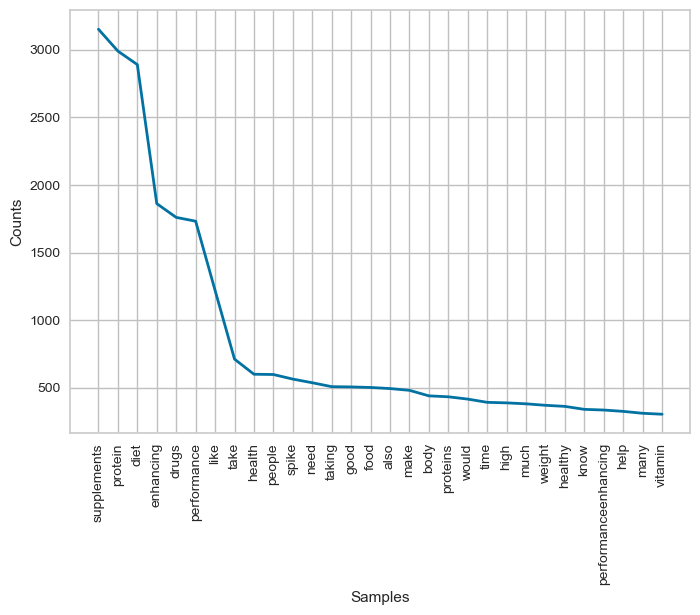

In [405]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

<AxesSubplot:>

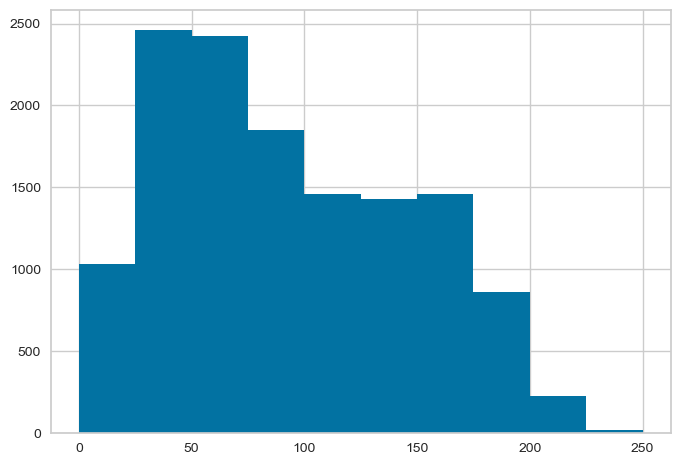

In [406]:
#Character count in the tweets 
newtd['ctweet'].str.len().hist()

<AxesSubplot:>

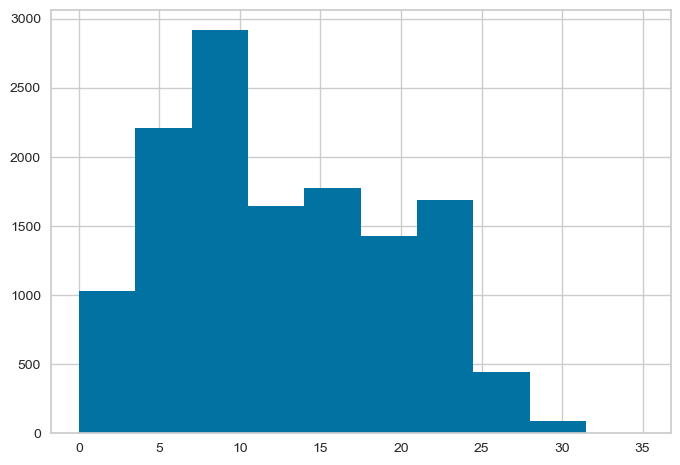

In [407]:
#word count int he given tweet
newtd['ctweet'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

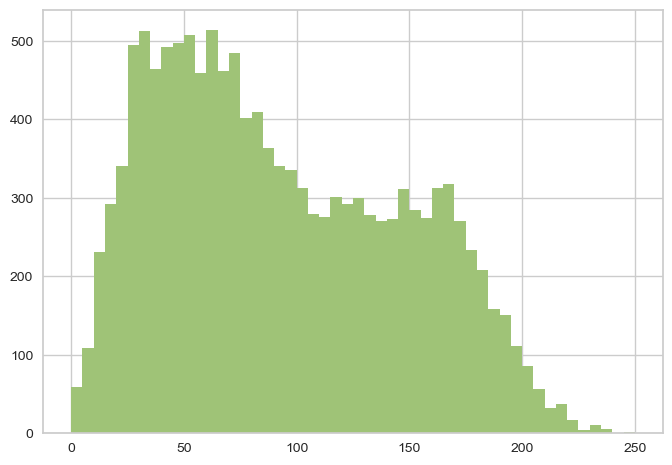

In [408]:
newtd['length'] = newtd['ctweet'].apply(len)
#Taking a look at the distribution of the text lengths
newtd['length'].hist(bins = 50, color = 'g')

In [519]:
newtd.tail()

date                                              tweet  \
13227  2023-01-31              thisss ! how do i get my diet right ?   
13228  2023-01-31  @KathleenMulcah3 @RedaMor_ Gained a boatload o...   
13229  2023-01-31  @soandso2023 @MarindaVannoy1 Current thinking ...   
13230  2023-01-31  Today @CllrAlexCatt &amp; I proposed a motion ...   
13231  2023-01-31  @Fox_Named_Kitty @pokimanelol You should proba...   

       retweetCount  likeCount      username  user_followersCount topic  \
13227             0          0      gxnmarix                  358  diet   
13228             0          0   scooter7pkr                  209  diet   
13229             0          0  nexuseditor1                  853  diet   
13230             3         19   jajo_osborn                 2012  diet   
13231             0          0  femboi_emily                  493  diet   

      sentiments  score                                             ctweet  \
13227   positive      1                                  thisss diet right   
13228    neutral      0               gained boatload weight mcdonald diet   
13229   negative     -1  current thinking fake oestrogen lodges recepto...   
13230    neutral      0  today proposed motion norwich city council end...   
13231    neutral      0                               probably target diet   

       length  
13227      17  
13228      36  
13229     160  
13230     188  
13231      20

In [ ]:
samp = newtd.columns()
#samp.to_csv('/Users/sbp/Downloads/ClusterData_Twitter.csv', index=False)

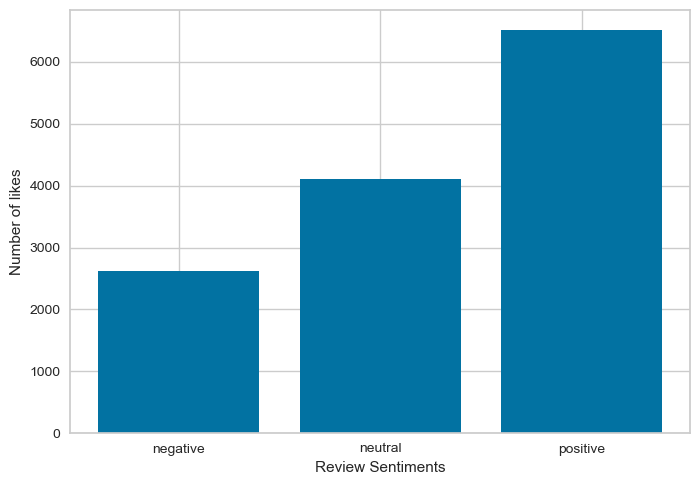

In [410]:
Sentiment_count=newtd.groupby('sentiments').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['likeCount'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of likes')
plt.show()

In [411]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)

count_train = count_vec.fit(newtd['ctweet'])
bag_of_words = count_vec.transform(newtd['ctweet'])
count_array = bag_of_words.toarray()

count_vect_df = pd.DataFrame(data=count_array,columns = count_vec.get_feature_names())
print(count_vec.get_feature_names())
count_vect_df

['body', 'coke', 'diet', 'drugs', 'enhancing', 'food', 'good', 'health', 'know', 'like', 'make', 'need', 'people', 'performance', 'protein', 'proteins', 'spike', 'supplements', 'taking', 'time']


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


body  coke  diet  drugs  enhancing  food  good  health  know  like  \
0         0     0     0      0          0     0     0       0     0     0   
1         0     0     0      0          0     0     0       0     0     0   
2         0     0     0      0          0     0     0       0     1     0   
3         0     0     0      0          0     0     0       0     0     0   
4         0     0     0      0          0     0     0       0     0     0   
...     ...   ...   ...    ...        ...   ...   ...     ...   ...   ...   
13227     0     0     1      0          0     0     0       0     0     0   
13228     0     0     1      0          0     0     0       0     0     0   
13229     1     0     1      0          0     0     0       0     0     0   
13230     0     0     0      0          0     0     0       1     0     0   
13231     0     0     1      0          0     0     0       0     0     0   

       make  need  people  performance  protein  proteins  spike  supplements  \
0         0     0       0            0        0         0      0            1   
1         0     0       0            0        0         0      0            1   
2         0     0       0            0        0         0      0            0   
3         0     0       0            0        0         0      0            1   
4         1     0       0            0        0         0      0            1   
...     ...   ...     ...          ...      ...       ...    ...          ...   
13227     0     0       0            0        0         0      0            0   
13228     0     0       0            0        0         0      0            0   
13229     0     0       0            0        0         0      0            0   
13230     0     0       0            0        0         0      0            0   
13231     0     0       0            0        0         0      0            0   

       taking  time  
0           0     0  
1           0     0  
2           0     0  
3           0     0  
4           1     0  
...       ...   ...  
13227       0     0  
13228       0     0  
13229       0     0  
13230       0     0  
13231       0     0  

[13232 rows x 20 columns]

In [528]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vec.fit_transform(newtd['ctweet'])
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vec.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

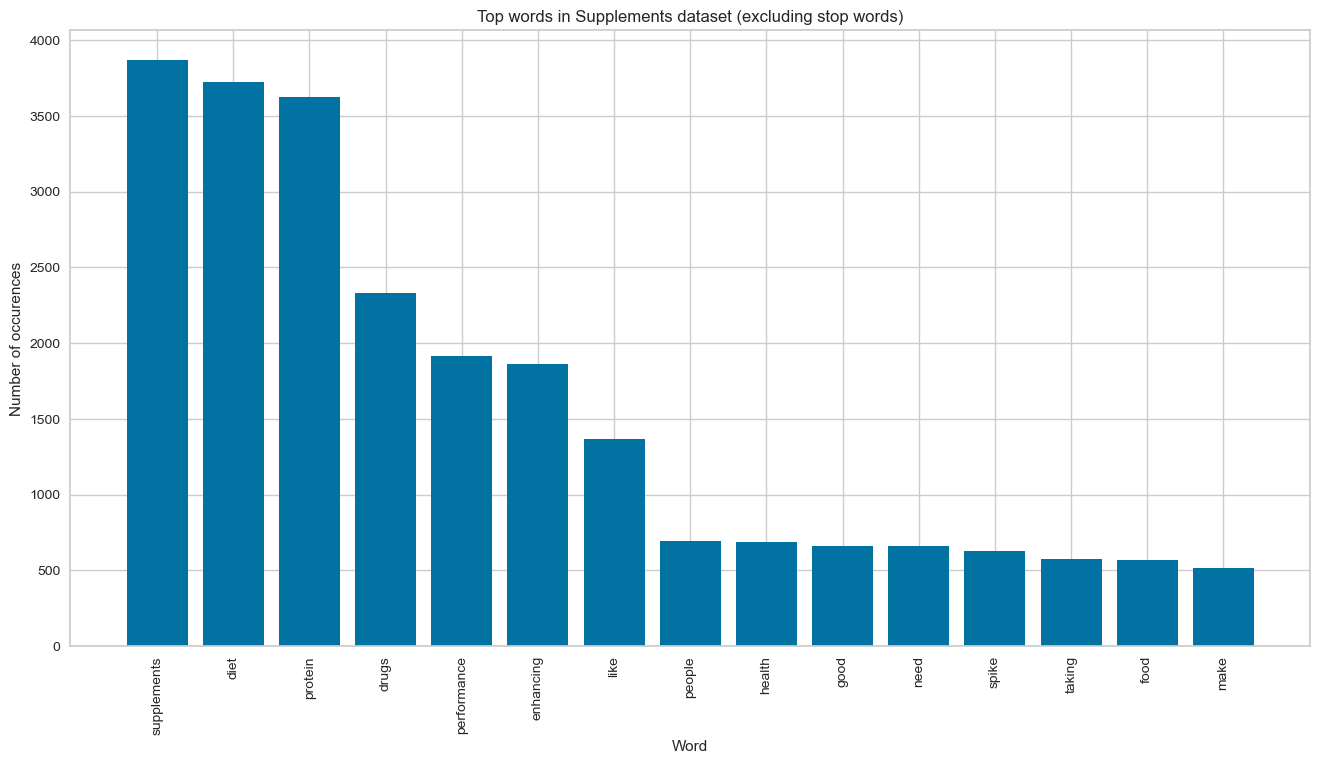

In [529]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vect_df, 
                                     text_data=newtd['ctweet'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in Supplements dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [412]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvec=TfidfVectorizer(analyzer='word', stop_words="english",ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=30)
X = tfidvec.fit_transform(newtd['ctweet'])
txt = X.toarray()
count_vect_tdidf = pd.DataFrame(data=txt,columns = tfidvec.get_feature_names_out())
count_vect_tdidf

body  coke      diet  drugs  eating  enhancing  food  good  health  \
0      0.000000   0.0  0.000000    0.0     0.0        0.0   0.0   0.0     0.0   
1      0.000000   0.0  0.000000    0.0     0.0        0.0   0.0   0.0     0.0   
2      0.000000   0.0  0.000000    0.0     0.0        0.0   0.0   0.0     0.0   
3      0.000000   0.0  0.000000    0.0     0.0        0.0   0.0   0.0     0.0   
4      0.000000   0.0  0.000000    0.0     0.0        0.0   0.0   0.0     0.0   
...         ...   ...       ...    ...     ...        ...   ...   ...     ...   
13227  0.000000   0.0  1.000000    0.0     0.0        0.0   0.0   0.0     0.0   
13228  0.000000   0.0  0.448625    0.0     0.0        0.0   0.0   0.0     0.0   
13229  0.883257   0.0  0.468889    0.0     0.0        0.0   0.0   0.0     0.0   
13230  0.000000   0.0  0.000000    0.0     0.0        0.0   0.0   0.0     1.0   
13231  0.000000   0.0  1.000000    0.0     0.0        0.0   0.0   0.0     0.0   

       healthy  ...  proteins  really  spike  supplements    taking  think  \
0          0.0  ...       0.0     0.0    0.0     1.000000  0.000000    0.0   
1          0.0  ...       0.0     0.0    0.0     1.000000  0.000000    0.0   
2          0.0  ...       0.0     0.0    0.0     0.000000  0.000000    0.0   
3          0.0  ...       0.0     0.0    0.0     0.432578  0.000000    0.0   
4          0.0  ...       0.0     0.0    0.0     0.354969  0.650989    0.0   
...        ...  ...       ...     ...    ...          ...       ...    ...   
13227      0.0  ...       0.0     0.0    0.0     0.000000  0.000000    0.0   
13228      0.0  ...       0.0     0.0    0.0     0.000000  0.000000    0.0   
13229      0.0  ...       0.0     0.0    0.0     0.000000  0.000000    0.0   
13230      0.0  ...       0.0     0.0    0.0     0.000000  0.000000    0.0   
13231      0.0  ...       0.0     0.0    0.0     0.000000  0.000000    0.0   

       time   vitamin  want   weight  
0       0.0  0.000000   0.0  0.00000  
1       0.0  0.000000   0.0  0.00000  
2       0.0  0.000000   0.0  0.00000  
3       0.0  0.901596   0.0  0.00000  
4       0.0  0.000000   0.0  0.00000  
...     ...       ...   ...      ...  
13227   0.0  0.000000   0.0  0.00000  
13228   0.0  0.000000   0.0  0.89372  
13229   0.0  0.000000   0.0  0.00000  
13230   0.0  0.000000   0.0  0.00000  
13231   0.0  0.000000   0.0  0.00000  

[13232 rows x 30 columns]

In [450]:
train_tweets_sampled = newtd.sample(frac=0.025, replace=True, random_state=1)


In [521]:
train_tweets_sampled.head()
train_tweets_sampled.to_csv('/Users/sbp/Downloads/Trans_Twitter.csv', index=False)

**Clustering¶
Find Clustering models for count vectorizer


In [452]:
labels = train_tweets_sampled[["topic"]].reset_index(drop = True)
text = train_tweets_sampled[["ctweet"]].reset_index(drop = True)
countVectorizer = CountVectorizer(max_df=6, min_df=1, max_features=500, strip_accents="ascii") 
countVector = countVectorizer.fit_transform(train_tweets_sampled['ctweet'])
words = countVectorizer.get_feature_names()
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2023  2024  academy  acid  active  actual  actually  adults  alhaithem  \
0     0     0        0     0       0       0         0       0          0   
1     0     0        0     0       0       0         0       0          0   
2     0     0        2     0       0       0         0       0          0   
3     0     0        0     0       0       0         0       0          0   
4     0     0        0     0       0       0         0       0          0   

   almond  ...  workout  world  worse  yeah  year  years  yeast  young  zero  \
0       0  ...        0      0      0     0     0      0      0      0     0   
1       0  ...        0      0      0     0     0      0      0      0     0   
2       0  ...        0      0      0     0     0      0      0      0     0   
3       0  ...        0      0      0     0     0      0      0      0     0   
4       0  ...        0      0      0     0     0      0      0      0     0   

   zinc  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 500 columns]

In [548]:
count_vect_df.to_csv('/Users/sbp/Downloads/ClusterData_Twitter.csv', index=False)

In [453]:
count_vect_df_ = pd.concat([labels, count_vect_df], axis=1)

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Use

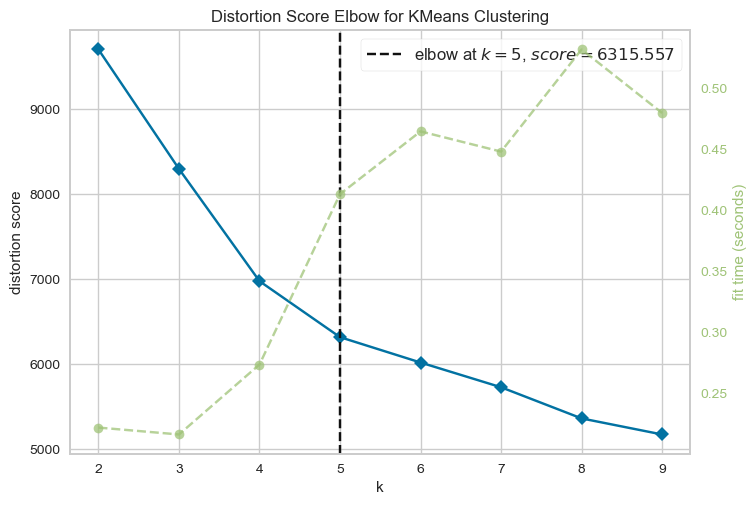

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [535]:
# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=10,random_state=0)
#     kmeans.fit(countVector)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1,11),wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.savefig('elbow.png')
# plt.show()
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()       

In [466]:
from sklearn.decomposition import PCA

# Perform PCA with 2 components
pca = PCA(n_components=10)
pca.fit(countVector.toarray())

# Transform TF-IDF matrix to 2D space
cdf_2d = pca.transform(countVector.toarray())
X_principal = pd.DataFrame(cdf_2d) 

X_principal.head(2)

0         1         2         3        4         5         6  \
0 -0.021959 -0.023513 -0.075852 -0.024886 -0.03284 -0.078589  0.006049   
1 -0.034287 -0.028131 -0.068817 -0.115119 -0.18381  0.050292  0.116147   

          7         8         9  
0 -0.040410 -0.011905 -0.045422  
1  0.150236 -0.096490 -0.076138

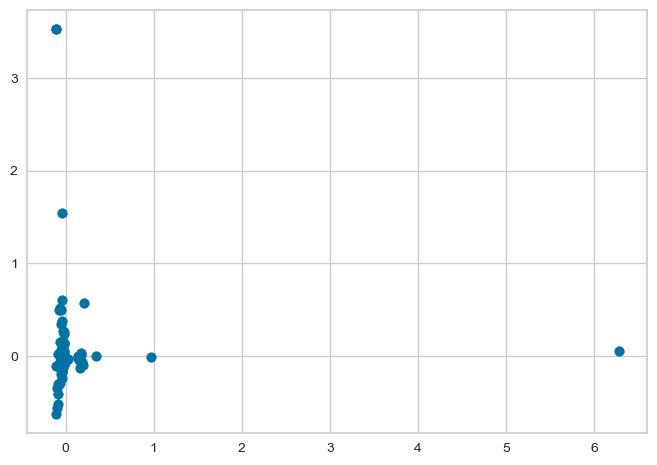

In [467]:
import matplotlib.pyplot as plt

plt.scatter(cdf_2d[:, 0], cdf_2d[:, 1])
plt.show()

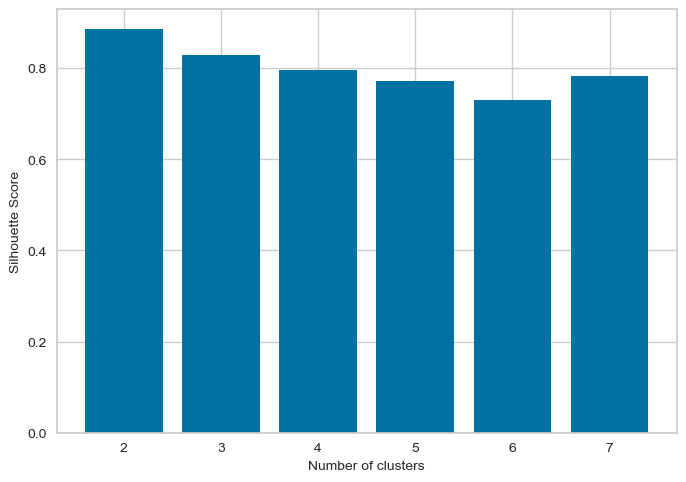

In [468]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(tfidf_2d))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

For n_clusters = 2 The average   silhoutte_score is : 0.8849285661978155


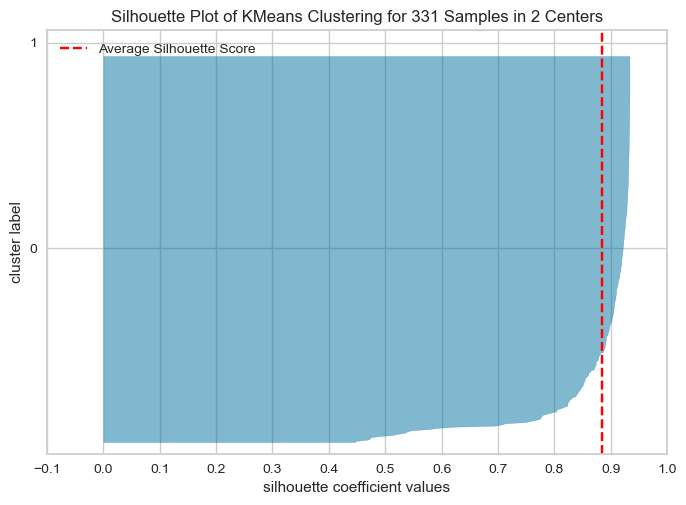

For n_clusters = 3 The average   silhoutte_score is : 0.812809441728592


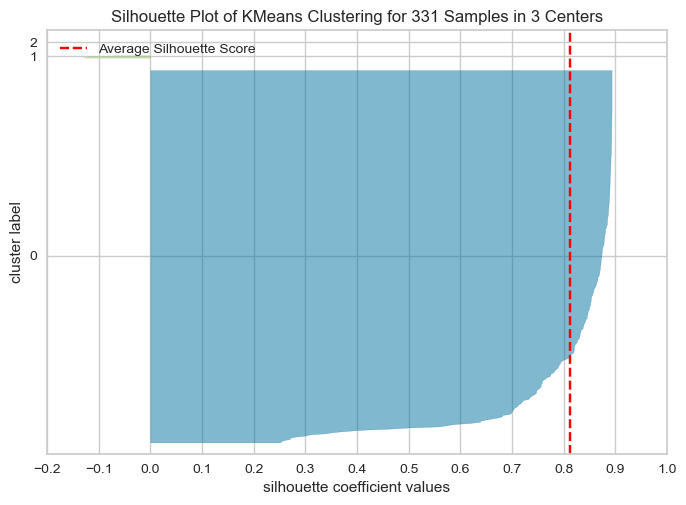

For n_clusters = 4 The average   silhoutte_score is : 0.7962628114376338


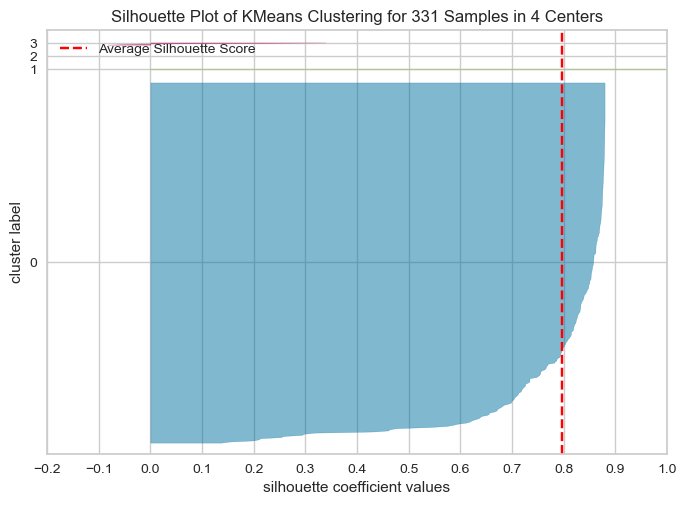

For n_clusters = 5 The average   silhoutte_score is : 0.7712885802003497


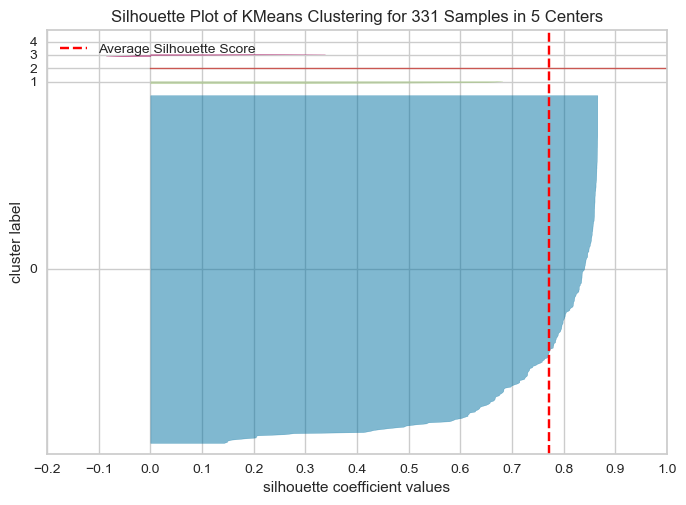

For n_clusters = 7 The average   silhoutte_score is : 0.7813364575493822


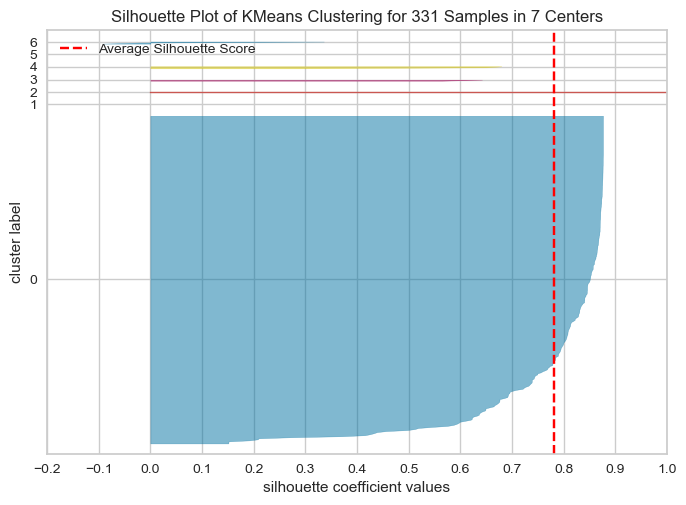

For n_clusters = 8 The average   silhoutte_score is : 0.7844265465003705


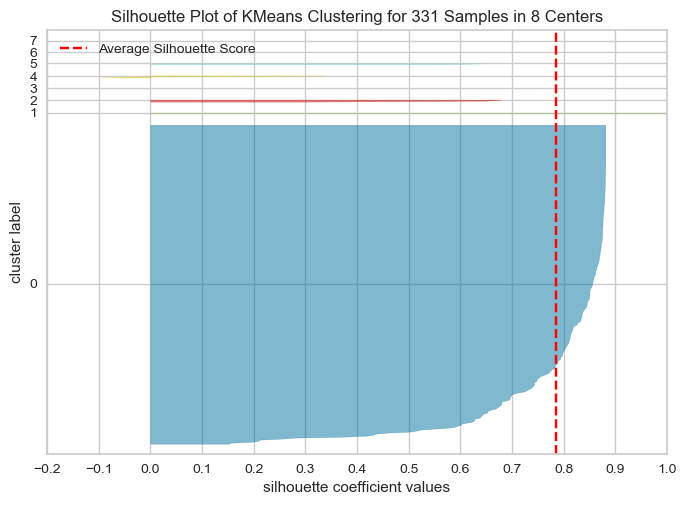

In [547]:
#import libraries
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
#Kmeans Clustering
range_n_clusters = [2, 3, 4, 5, 7, 8]
for n_clusters in range_n_clusters:
        #Initializing the clusterer with n_clusters value and a random   generator
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_principal)
        #The silhouette_score gives the average value for all the   samples.
        #Calculating number of clusters
        silhouette_avg = silhouette_score(X_principal, cluster_labels)
        print("For n_clusters =", n_clusters,"The average   silhoutte_score is :", silhouette_avg)
        #Using Silhouette Plot
        visualizer = SilhouetteVisualizer(clusterer,colors =  'yellowbrick')
        #Fit the data to the visualizer
        visualizer.fit(X_principal)       
        #Render the figure
        visualizer.show()

In [559]:
k = 4

In [560]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = countVectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: banned always annual bagel adults actually antitox academy believe almost
Cluster 1: academy always best actually annual adults antitox almond become begin
Cluster 2: banned always acid 2023 anyone believe adults bars academy become
Cluster 3: baby always along adults annual academy active amazon begin actually


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [561]:
def frequencies_dict(cluster_index):
    if cluster_index > k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [562]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

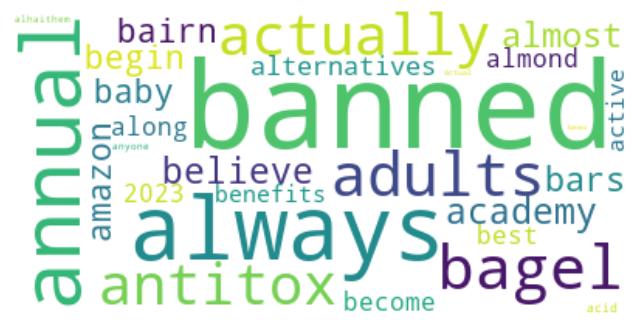

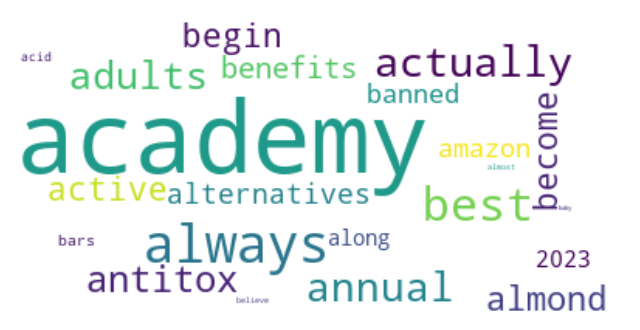

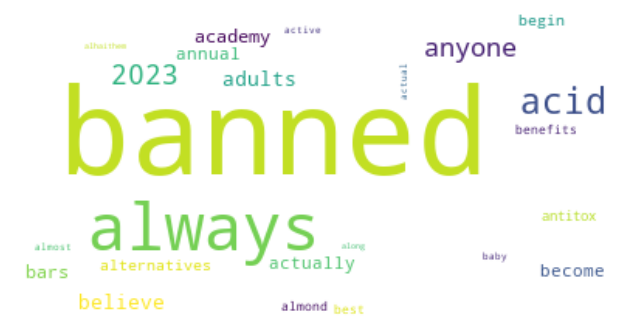

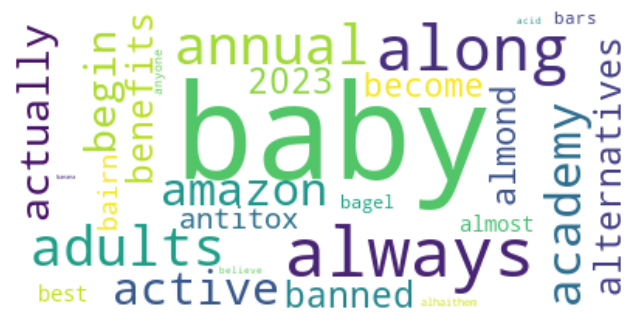

In [563]:
for i in range(k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

### LDA

In [497]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [498]:
num_topics = 7

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(count_vect_df)

In [499]:
print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

SIZE:  (331, 7)


In [501]:
# Let's see how the first document in the corpus looks like in
## different topic spaces
print("First headline...")
print(LDA_DH_Model[0])
print("Seventh headline...")
print(LDA_DH_Model[6])

First headline...
[0.04761912 0.04761918 0.04764621 0.04761915 0.04761912 0.71425811
 0.04761912]
Seventh headline...
[0.07142864 0.0714287  0.07142866 0.07151158 0.57134513 0.07142865
 0.07142864]


In [502]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order


In [507]:
####### call the function above with our model and CountV and display top 10 words for each topic
print_topics(lda_model_DH, countVectorizer,10)

Topic:   0
[('exercise', 6.361062264146406), ('changes', 5.724360829142157), ('immune', 5.0732378698235205), ('gonna', 4.862373550331763), ('poor', 4.846926602748015), ('less', 4.211023023782974), ('target', 3.9860408757424723), ('last', 3.98503406992774), ('milk', 3.575040559159919), ('mrna', 3.543805616480801)]
Topic:   1
[('build', 6.811942482242336), ('label', 3.5904300014562605), ('important', 3.575878282663295), ('world', 3.349918928522859), ('covid', 2.7285211162511462), ('mind', 2.697455419303996), ('criterion', 2.697453799732942), ('mild', 2.6971503971421575), ('shake', 2.487828440046457), ('caffeine', 2.4876557258024716)]
Topic:   2
[('part', 5.0580821275959424), ('coke', 4.405684910689937), ('blood', 4.226449736338502), ('giving', 3.9981229886832153), ('healing', 3.544110808090432), ('hugs', 3.5437997998973407), ('michelle', 3.543799519552053), ('become', 3.3490158652313013), ('regular', 3.139693092396907), ('name', 3.138684156814681)]
Topic:   3
[('vegan', 8.294495719888042

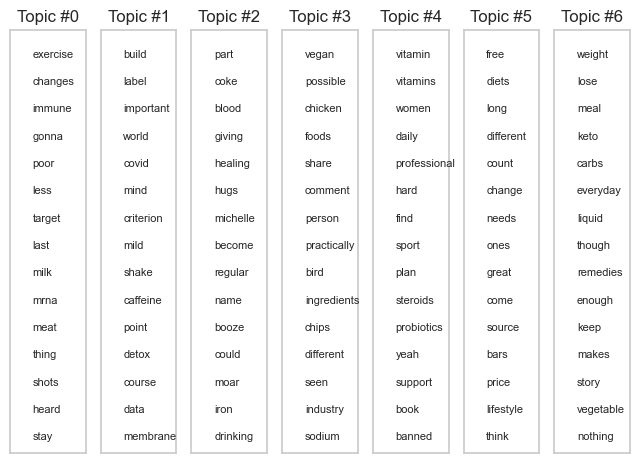

In [512]:
import matplotlib.pyplot as plt
import numpy as np

vocab = countVectorizer.get_feature_names()
word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=8)
                 ##fontsize_base*share)

#plt.tight_layout()
plt.show()

In [516]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis


pyLDAvis.enable_notebook()

panel = LDAvis.prepare(lda_model_DH, countVector, countVectorizer, mds='tsne')

pyLDAvis.save_html(panel, "/Users/sbp/Downloads/Supplement_Topics.html")


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/sbp/opt/anaconda3/lib/python3.9/site-pa

In [536]:
lsa_model = TruncatedSVD(n_components=8)
lsa_topic_matrix = lsa_model.fit_transform(count_vect_df)

In [538]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)